In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [ ]:
import os
from pathlib import Path

folder = "/content/drive/MyDrive"
project_dir = "01_dnn_tf"

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/MyDrive/01_dnn_tf


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import check_util.checker as checker
from IPython.display import clear_output

import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


tensorflow version: 2.15.0
GPU 사용 가능 여부: True


In [ ]:
batch_size = 128
max_epochs = 5
learning_rate = 0.001
num_classes = 10

In [ ]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape([-1, 28 * 28])
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape([-1, 28 * 28])
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

In [ ]:
# tf.data.Dataset 만드는 간단한 예제
temp_dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4])
temp_dataset = temp_dataset.shuffle(100)
temp_dataset = temp_dataset.batch(2)
temp_dataset = temp_dataset.repeat(3)

In [ ]:
# 실제 data를 추출하는 과정
for epoch in range(3):
    count = 0 # 무한루프 방지용
    for step, data in enumerate(temp_dataset):
        print("epoch: {}  step: {}  data: {}".format(
              epoch+1, step+1, data))
        count += 1
        if count > 10:
            break

epoch: 1  step: 1  data: [3 2]
epoch: 1  step: 2  data: [1 4]
epoch: 1  step: 3  data: [2 3]
epoch: 1  step: 4  data: [1 4]
epoch: 1  step: 5  data: [3 1]
epoch: 1  step: 6  data: [2 4]
epoch: 2  step: 1  data: [2 3]
epoch: 2  step: 2  data: [1 4]
epoch: 2  step: 3  data: [1 4]
epoch: 2  step: 4  data: [3 2]
epoch: 2  step: 5  data: [3 2]
epoch: 2  step: 6  data: [1 4]
epoch: 3  step: 1  data: [1 3]
epoch: 3  step: 2  data: [2 4]
epoch: 3  step: 3  data: [3 4]
epoch: 3  step: 4  data: [2 1]
epoch: 3  step: 5  data: [2 1]
epoch: 3  step: 6  data: [4 3]


**이제 모델에게 전달할 데이터 공급 코드를 작성해보세요! "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 <font color='075D37'>None</font> 부분을 채우시면 됩니다.**

In [ ]:
# for train
N = len(train_data)

train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(train_data.size)
train_dataset = train_dataset.batch(batch_size)

print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.shuffle(test_data.size)
test_dataset = test_dataset.batch(batch_size)

print(test_dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


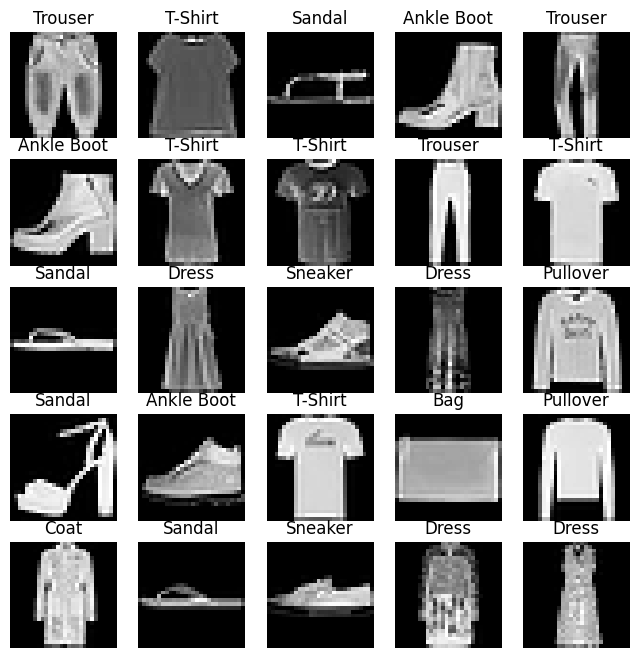

In [ ]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx].reshape([28, 28])
    label = labels_map[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
model = tf.keras.Sequential() # Sequential 모델 생성

In [ ]:
model.add(layers.Flatten(input_dim = 28 * 28))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
#model.add(layers.Activation('relu'))
model.add(layers.Dense(10, activation = 'softmax'))
#model.add(layers.Dense(10))
#model.add(layers.Activation('softmax'))

In [ ]:
for images, labels in train_dataset.take(1):
    print("predictions: ", model(images[0:3]))

predictions:  tf.Tensor(
[[0.07673739 0.11116594 0.12841175 0.15149026 0.08396135 0.09089158
  0.1353265  0.07949581 0.08318631 0.0593331 ]
 [0.04762879 0.12340639 0.08010376 0.11981852 0.1071706  0.07860419
  0.11324695 0.18612564 0.10865156 0.03524354]
 [0.07082571 0.10916642 0.11390617 0.07801161 0.09214054 0.08422858
  0.11731967 0.11532109 0.1523113  0.06676892]], shape=(3, 10), dtype=float32)


In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_51 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_31 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 re_lu_8 (ReLU)              (None, 512)               0         
                                                                 
 dense_52 (Dense)            (None, 10)                5130      
                                                                 
 softmax_2 (Softmax)         (None, 10)                0         
                                                     

In [ ]:
#!pip install tensorflow==2.0
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.Accuracy('accuracy')

model.compile(optimizer = optimizer,
              loss = loss,
              metrics = ['accuracy'])

In [ ]:
model.fit(train_dataset, steps_per_epoch = len(train_data)/batch_size, epochs= max_epochs)

Epoch 1/5
468/468 [==============================] - 20s 42ms/step - loss: 1.5984 - accuracy: 0.8676
Epoch 2/5


468/468 [==============================] - 0s 15us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
loss,accuracy = model.evaluate(test_dataset, steps = len(test_data)//batch_size)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(accuracy))

78/78 [==============================] - 2s 17ms/step - loss: 1.6287 - accuracy: 0.8346
test loss is 1.6287397146224976
test accuracy is 0.8346354365348816


In [ ]:
model.predict(tf.reshape(images[0], (1,-1)))

1/1 [==============================] - 0s 22ms/step


array([[0.0853459 , 0.08534593, 0.0853459 , 0.08534662, 0.0853459 ,
        0.08540744, 0.0853459 , 0.08534607, 0.08534595, 0.23182438]],
      dtype=float32)

In [ ]:
model(tf.reshape(images[0], (1,-1)), training = False)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0853459 , 0.08534593, 0.0853459 , 0.08534662, 0.0853459 ,
        0.08540744, 0.0853459 , 0.08534607, 0.08534595, 0.23182438]],
      dtype=float32)>

In [ ]:
model(tf.reshape(images[0], (1,-1)))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0853459 , 0.08534593, 0.0853459 , 0.08534662, 0.0853459 ,
        0.08540744, 0.0853459 , 0.08534607, 0.08534595, 0.23182438]],
      dtype=float32)>

In [ ]:
model(tf.reshape(images[0], (1,-1)), training = True)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0990606 , 0.09992955, 0.10412011, 0.10080544, 0.09900425,
        0.09657636, 0.10239511, 0.09931944, 0.09942251, 0.09936665]],
      dtype=float32)>

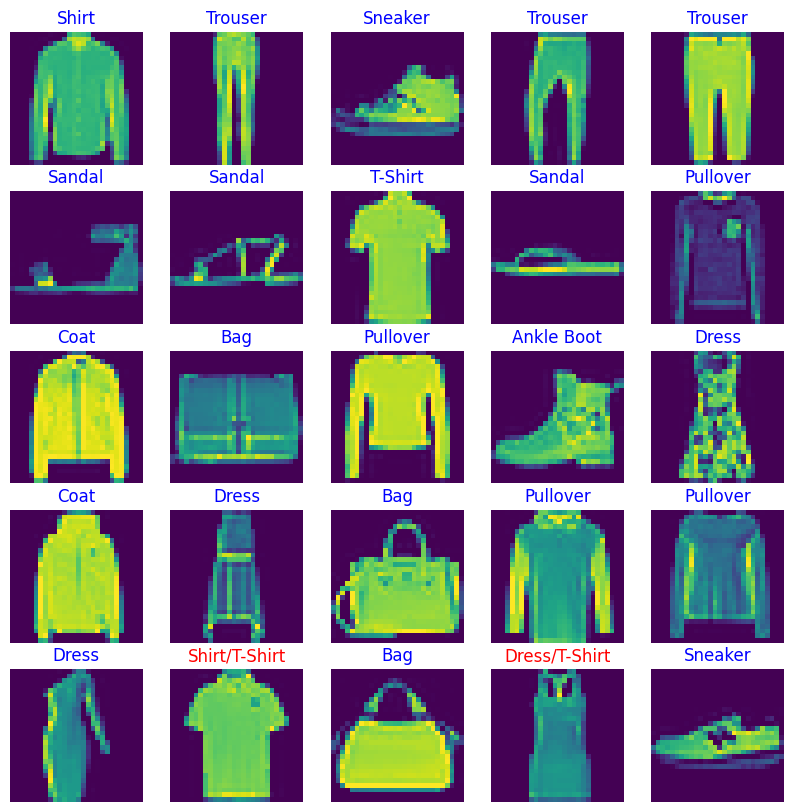

In [ ]:
test_batch_size = 25
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28))
    p.axis('off')

- Multi layer perceptron을 설계할 수 있다.
- 네트워크에 ReLU, Batch normalization를 적용할 수 있다.
- `tf.data.Dataset`을 이용하여 데이터입력 파이프라인(input pipeline)을 만들 수 있다.
- 손실함수(loss function)과 옵티마이져(optimizer)를 정의할 수 있다.
- 손실(loss)를 측정하고 경사(gradient)를 계산해 모델 파라미터를 업데이트할 수 있다.
- 학습한 모델의 성능을 테스트 할 수 있다.